# 실험 

In [1]:
import gc
gc.collect()

151

In [2]:
import n2d
import numpy as np
import hdbscan
import umap
import pandas as pd
# from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering, KMeans 
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
import seaborn as sns
import tensorflow as tf
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib import font_manager, rc
sns.set(font_scale=1.4)
# 한글 폰트 사용을 위해서 세팅
font_path = "C:/Windows/Fonts/malgun.TTF"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
SEED = 2022
np.random.seed(SEED)
tf.random.set_seed(SEED)

# 클러스터 개수, 데이터 버전
ver = 1
n_clusters = 9

# 데이터 가져오기
x = pd.read_csv('./data/data_clustering_sobi_ver{}.csv'.format(ver))
# x = pd.read_csv('./data/newdata_clustering_sobi_ver{}.csv'.format(ver))
# x = pd.read_csv('./data/그냥로그_scaled.csv')
# x = pd.read_csv('./data/그냥로그.csv')

c:\Users\YOUNGBIN\anaconda3\envs\n2d\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [23]:
# ae object
ae = n2d.AutoEncoder(
    input_dim=x.shape[-1], latent_dim=n_clusters, architecture=[10, 10], act='relu')

# umap arguments
umap_args = {"metric":"euclidean", "n_components":3, "n_neighbors":20, "min_dist":0, 'random_state':SEED} # default값 찾아서 사용함


In [24]:
# load model
# n2d_GMM = n2d.load_n2d('./models/GMM.h5', './models/GMM.sav')

In [54]:
og = pd.read_csv('./data/data_2019_2021_revised.csv')

og = og[['소득']]


C:\Users\YOUNGBIN\AppData\Local\Temp\ipykernel_25164\1923189814.py:1: DtypeWarning: Columns (71,72,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  og = pd.read_csv('./data/data_2019_2021_revised.csv')


In [51]:
x

,식료품비주류음료구입비,주류담배구입비,의류신발구입비,주거수도광열비,가정용품가사서비스이용금액,보건제품구입비,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용금액
0,0.354795,0.004935,0.015852,0.202862,0.003963,0.023131,0.047776,0.073053,0.010059,0.000000,0.091774,0.171799
1,0.187313,0.001025,0.010843,0.199045,0.009981,0.110230,0.076543,0.057171,0.022645,0.022028,0.123908,0.179266
2,0.125368,0.001801,0.097792,0.252296,0.035849,0.040166,0.018412,0.023273,0.287130,0.000000,0.106167,0.011747
3,0.135129,0.004398,0.037949,0.124869,0.001438,0.017652,0.123128,0.107355,0.041332,0.017592,0.289794,0.099364
4,0.033236,0.006272,0.068057,0.034982,0.554156,0.031323,0.004408,0.007514,0.090670,0.000000,0.025642,0.143741
...,...,...,...,...,...,...,...,...,...,...,...,...
72225,0.177179,0.034906,0.015222,0.033806,0.018089,0.047683,0.121903,0.043027,0.028867,0.092615,0.297132,0.089570
72226,0.145644,0.008737,0.066905,0.065736,0.022591,0.009949,0.020063,0.038557,0.087088,0.058650,0.311238,0.164843
72227,0.085509,0.010416,0.082540,0.022762,0.036786,0.014289,0.173627,0.241265,0.115185,0.000000,0.163013,0.054607
72228,0.187142,0.021166,0.026734,0.091492,0.078667,0.061743,0.174814,0.037922,0.026923,0.000000,0.146716,0.146682


In [55]:
df = pd.concat([og, x], axis=1)
df

,소득,식료품비주류음료구입비,주류담배구입비,의류신발구입비,주거수도광열비,가정용품가사서비스이용금액,보건제품구입비,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용금액
0,425000,0.354795,0.004935,0.015852,0.202862,0.003963,0.023131,0.047776,0.073053,0.010059,0.000000,0.091774,0.171799
1,2682647,0.187313,0.001025,0.010843,0.199045,0.009981,0.110230,0.076543,0.057171,0.022645,0.022028,0.123908,0.179266
2,0,0.125368,0.001801,0.097792,0.252296,0.035849,0.040166,0.018412,0.023273,0.287130,0.000000,0.106167,0.011747
3,3702933,0.135129,0.004398,0.037949,0.124869,0.001438,0.017652,0.123128,0.107355,0.041332,0.017592,0.289794,0.099364
4,2050000,0.033236,0.006272,0.068057,0.034982,0.554156,0.031323,0.004408,0.007514,0.090670,0.000000,0.025642,0.143741
...,...,...,...,...,...,...,...,...,...,...,...,...,...
72225,5021610,0.177179,0.034906,0.015222,0.033806,0.018089,0.047683,0.121903,0.043027,0.028867,0.092615,0.297132,0.089570
72226,3717930,0.145644,0.008737,0.066905,0.065736,0.022591,0.009949,0.020063,0.038557,0.087088,0.058650,0.311238,0.164843
72227,5388172,0.085509,0.010416,0.082540,0.022762,0.036786,0.014289,0.173627,0.241265,0.115185,0.000000,0.163013,0.054607
72228,5434060,0.187142,0.021166,0.026734,0.091492,0.078667,0.061743,0.174814,0.037922,0.026923,0.000000,0.146716,0.146682


In [56]:
df['cluster'] = pred
df

,소득,식료품비주류음료구입비,주류담배구입비,의류신발구입비,주거수도광열비,가정용품가사서비스이용금액,보건제품구입비,교통비,통신비,오락문화비,교육비,음식숙박비,기타상품서비스이용금액,cluster
0,425000,0.354795,0.004935,0.015852,0.202862,0.003963,0.023131,0.047776,0.073053,0.010059,0.000000,0.091774,0.171799,1
1,2682647,0.187313,0.001025,0.010843,0.199045,0.009981,0.110230,0.076543,0.057171,0.022645,0.022028,0.123908,0.179266,1
2,0,0.125368,0.001801,0.097792,0.252296,0.035849,0.040166,0.018412,0.023273,0.287130,0.000000,0.106167,0.011747,2
3,3702933,0.135129,0.004398,0.037949,0.124869,0.001438,0.017652,0.123128,0.107355,0.041332,0.017592,0.289794,0.099364,5
4,2050000,0.033236,0.006272,0.068057,0.034982,0.554156,0.031323,0.004408,0.007514,0.090670,0.000000,0.025642,0.143741,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72225,5021610,0.177179,0.034906,0.015222,0.033806,0.018089,0.047683,0.121903,0.043027,0.028867,0.092615,0.297132,0.089570,5
72226,3717930,0.145644,0.008737,0.066905,0.065736,0.022591,0.009949,0.020063,0.038557,0.087088,0.058650,0.311238,0.164843,5
72227,5388172,0.085509,0.010416,0.082540,0.022762,0.036786,0.014289,0.173627,0.241265,0.115185,0.000000,0.163013,0.054607,5
72228,5434060,0.187142,0.021166,0.026734,0.091492,0.078667,0.061743,0.174814,0.037922,0.026923,0.000000,0.146716,0.146682,5


## HC

In [65]:
method = 'HC'

# hc arguments
hc_args = {"n_clusters":n_clusters, 'linkage':'ward'}

In [66]:
# manifold and cluster object
hc_clust = n2d.manifold_cluster_generator(
    umap.UMAP, umap_args, AgglomerativeClustering, hc_args)

# n2d object
n2d_HC = n2d.n2d(ae, hc_clust)

# train ae
epochs = 50 # 1 in 6min, 50 in 10min
n2d_HC.fit(x, weight_id = f'models/weights/{method}-e{epochs}-k{n_clusters}-v{ver}-ae_weights.h5',
           epochs=epochs, batch_size=64, loss='mse', optimizer='adam', patience=5)

# save labels
preds = n2d_HC.clusterer.labels_
pd.DataFrame(preds).to_csv(
    f"clustering_results/pred_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save embeddings
hle = hc_clust.hle
pd.DataFrame(hle).to_csv(
    f"clustering_results/hle_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save model
print('save model..')
n2d.save_n2d(n2d_HC, encoder_id=f'models/{method}-{epochs}-k{n_clusters}-v{ver}.h5',
             manifold_id=f'models/{method}-{epochs}-k{n_clusters}-v{ver}.sav')


Epoch 1/50
1129/1129 [==============================] - 7s 6ms/step - loss: 0.0039
Epoch 2/50
1129/1129 [==============================] - 6s 5ms/step - loss: 0.0015
Epoch 3/50
1129/1129 [==============================] - 6s 5ms/step - loss: 0.0013
Epoch 4/50
1129/1129 [==============================] - 6s 5ms/step - loss: 0.0011
Epoch 5/50
1129/1129 [==============================] - 6s 5ms/step - loss: 9.1240e-04
Epoch 6/50
1129/1129 [==============================] - 6s 5ms/step - loss: 7.9858e-04
Epoch 7/50
1129/1129 [==============================] - 6s 5ms/step - loss: 7.5915e-04
Epoch 8/50
1129/1129 [==============================] - 6s 5ms/step - loss: 7.4107e-04
Epoch 9/50
1129/1129 [==============================] - 6s 5ms/step - loss: 7.3139e-04
Epoch 10/50
1129/1129 [==============================] - 6s 5ms/step - loss: 7.2490e-04
Epoch 11/50
1129/1129 [==============================] - 6s 5ms/step - loss: 7.2200e-04
Epoch 12/50
1129/1129 [==============================] - 

## HDBSCAN

In [35]:
method = 'DB'

# hdbscan arguments
hdbscan_args = {"min_samples":None, "min_cluster_size":8, 'prediction_data':True, 'alpha':1.0} # random_state 없음

In [36]:
# manifold and cluster object
db_clust = n2d.manifold_cluster_generator(
    umap.UMAP, umap_args, hdbscan.HDBSCAN, hdbscan_args)

# n2d object
n2d_DB = n2d.n2d(ae, db_clust)

# train ae
epochs=1
n2d_DB.fit(x, weight_id=f'models/weights/{method}-e{epochs}-k{n_clusters}-v{ver}-ae_weights.h5',
                epochs=epochs, batch_size=64, loss='mse', optimizer='adam', patience=None) 

# save labels
probs = n2d_DB.clusterer.probabilities_
preds = n2d_DB.clusterer.labels_
pd.DataFrame(preds).to_csv(
    f"clustering_results/pred_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save embeddings
hle = db_clust.hle
pd.DataFrame(hle).to_csv(
    f"clustering_results/hle_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save model
print('save model..')
n2d.save_n2d(n2d_DB, encoder_id=f'models/{method}-e{epochs}-k{n_clusters}-v{ver}.h5',
             manifold_id=f'models/{method}-e{epochs}-k{n_clusters}-v{ver}.sav')

# number of clusters
print('number of clusters: ', len(set(preds)))


Epoch 1/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1209e-04
Epoch 2/10
1129/1129 [==============================] - 5s 5ms/step - loss: 3.1152e-04
Epoch 3/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1117e-04
Epoch 4/10
1129/1129 [==============================] - 5s 5ms/step - loss: 3.1165e-04
Epoch 5/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1163e-04
Epoch 6/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1110e-04
Epoch 7/10
1129/1129 [==============================] - 5s 5ms/step - loss: 3.1151e-04
Epoch 8/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1108e-04
Epoch 9/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1135e-04
Epoch 10/10
2258/2258 [==============================] - 3s 1ms/step
save model..


## GMM 

In [113]:
method = 'GMM'

In [114]:
# manifold and cluster object
manifoldGMM = n2d.UmapGMM(n_clusters=n_clusters, umap_dim=3, 
                        umap_neighbors=20, umap_min_distance=float(0), umap_metric='euclidean', random_state=SEED)

# n2d object
n2d_GMM = n2d.n2d(ae, manifoldGMM)

# train ae
epochs=50
n2d_GMM.fit(x, weight_id=f"models/weights/{method}-{epochs}-v{ver}-ae_weights.h5",
               epochs=epochs, batch_size=64, loss='mse', optimizer='adam', patience=5)

# save labels
preds = n2d_GMM.predict(x)
pd.DataFrame(preds).to_csv(
    f"clustering_results/pred_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save embeddings 
hle = n2d_GMM.hle
pd.DataFrame(hle).to_csv(
    f"clustering_results/hle_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save model
print('save model..')
n2d.save_n2d(n2d_GMM, encoder_id=f'models/{method}-e{epochs}-k{n_clusters}-v{ver}.h5',
             manifold_id=f'models/{method}-e{epochs}-k{n_clusters}-v{ver}.sav')

Epoch 1/50
1121/1121 [==============================] - 8s 6ms/step - loss: 2.2031
Epoch 2/50
1121/1121 [==============================] - 7s 6ms/step - loss: 2.2311
Epoch 3/50
1121/1121 [==============================] - 7s 6ms/step - loss: 2.3563
Epoch 4/50
1121/1121 [==============================] - 7s 6ms/step - loss: 2.0046
Epoch 5/50
1121/1121 [==============================] - 7s 6ms/step - loss: 1.9922
Epoch 6/50
1121/1121 [==============================] - 8s 7ms/step - loss: 1.8335
Epoch 7/50
1121/1121 [==============================] - 9s 8ms/step - loss: 1.8292
Epoch 8/50
1121/1121 [==============================] - 8s 7ms/step - loss: 2.1929
Epoch 9/50
1121/1121 [==============================] - 8s 8ms/step - loss: 2.0398
Epoch 10/50
1121/1121 [==============================] - 8s 7ms/step - loss: 2.3131
Epoch 11/50
1121/1121 [==============================] - 9s 8ms/step - loss: 1.9341
Epoch 12/50
1121/1121 [==============================] - 9s 8ms/step - loss: 1.5801
E

## KMEANS

In [18]:
method = 'KMEANS_그냥로그'

# umap arguments (((((2차원으로)))))
umap_args['n_components'] = 2

# kmeans arguments
kmeans_args = {"n_clusters":n_clusters, 'random_state':2022}


In [19]:
# manifold and cluster object
kmeans_clust = n2d.manifold_cluster_generator(
    umap.UMAP, umap_args, KMeans, kmeans_args)

# n2d object
n2d_KMEANS = n2d.n2d(ae, kmeans_clust)

# train ae
epochs = 10  # 1 in 6min, 50 in 10min
n2d_KMEANS.fit(x, weight_id=f'models/weights/{method}-e{epochs}-k{n_clusters}-v{ver}-ae_weights.h5',
           epochs=epochs, batch_size=64, loss='mse', optimizer='adam', patience=5)

# save labels
preds = n2d_KMEANS.clusterer.labels_
pd.DataFrame(preds).to_csv(
    f"clustering_results/pred_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save embeddings
hle = kmeans_clust.hle
pd.DataFrame(hle).to_csv(
    f"clustering_results/hle_{method}_e{epochs}_k{n_clusters}_v{ver}.csv", index=False)

# save model
print('save model..')
n2d.save_n2d(n2d_KMEANS, encoder_id=f'models/{method}-{epochs}-k{n_clusters}-v{ver}.h5',
             manifold_id=f'models/{method}-{epochs}-k{n_clusters}-v{ver}.sav')


Epoch 1/10
1129/1129 [==============================] - 6s 5ms/step - loss: 3.1599
Epoch 2/10
1129/1129 [==============================] - 6s 5ms/step - loss: 2.0574
Epoch 3/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.5306
Epoch 4/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.4458
Epoch 5/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.4170
Epoch 6/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.3736
Epoch 7/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.2562
Epoch 8/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.1548
Epoch 9/10
1129/1129 [==============================] - 6s 5ms/step - loss: 1.0469
Epoch 10/10
2258/2258 [==============================] - 2s 1ms/step
save model..


# 결과 

In [63]:
# 클러스터 라벨
pred = pd.read_csv('clustering_results/pred_HC_e50_k9_v1.csv')

# 3차원 임베딩
# hle = pd.read_csv('clustering_results/hle_HC_e50_k8-v2.csv')

## 요약 테이블 

In [64]:
# 가구실태 항목 중 ordinal numeric variables
df = pd.read_csv('./data/data_2019_2021_revised.csv')
cols_house = ['소득', '가구주_성별코드', '가구주_연령', '가구주_학력코드', '자동차보유대수', '주택소유유무', '가구구분코드','가구원수','취업인원수','세대구분코드']
df_house = df[cols_house]


C:\Users\YOUNGBIN\AppData\Local\Temp\ipykernel_25164\2662356706.py:2: DtypeWarning: Columns (71,72,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/data_2019_2021_revised.csv')


In [65]:
cols_sobi_ = [  '식료품비주류음료구입비', 
                '주류담배구입비', 
                '의류신발구입비', 
                '주거수도광열비', 
                '가정용품가사서비스이용금액', 
                '보건제품구입비', 
                '교통비', 
                '통신비', 
                '오락문화비',
                '교육비', 
                '음식숙박비', 
                '기타상품서비스이용금액']

# x = pd.read_csv('./data/data_2019_2021_revised.csv') ################################# 원본 데이터로 점수 구해봄 ####################################
x = pd.read_csv('./data/data_clustering_sobi_ver{}.csv'.format(1))

x = x[cols_sobi_]

In [66]:
def display_avg_table(df_house, df_feat):

    k = n_clusters
    features = df_feat.columns

    global df
    df = pd.concat([df_house, df_feat], axis=1)

    # 라벨 붙이기
    df['cluster'] = pred

    # 클러스터 관측 수 많은 순으로 정렬 # as_is_list = df.cluster.value_counts().keys()
    # 소득 많은 순으로 정렬 # # df.groupby('cluster')['소득'].mean().sort_values(ascending=False).index
    as_is_list = df.groupby('cluster')['소득'].mean().sort_values(ascending=False).index
    to_be_list = range(1, k+1)
    replacing_dict = dict(zip(as_is_list, to_be_list))
    df['cluster'] = df['cluster'].replace(replacing_dict)

    # 요약 테이블 시각화
    df_table = df.groupby('cluster').mean()

    # 정렬
    # 조사연월, 가구일련번호 제외
    features_house = cols_house #df_table.loc[:, '소득':'가구구분코드'].columns.tolist()
    features_sorted = df[features].mean().sort_values(ascending=False).keys().tolist()
    df_table = df_table[features_house + features_sorted]
    df_table = df_table.sort_values(by=['소득'], ascending=False)

    # 색칠
    global cm1, cm2
    # cm = sns.light_palette("blue", as_cmap=True)
    cm1 = sns.light_palette((260, 75, 60), input="husl", as_cmap=True) # blue
    cm2 = sns.light_palette((145, 65, 70), input="husl", as_cmap=True) # green

    f = dict.fromkeys(['가구주_성별코드', '가구주_학력코드', '자동차보유대수', '주택소유유무', 
                        '가구구분코드', '가구원수', '취업인원수', '세대구분코드'], '{:.2f}')
    f.update(dict.fromkeys(['소득', '가구주_연령'], '{:.0f}'))
    f.update(dict.fromkeys(features, '{:.3f}'))
    df_table = df_table.style.format(f).bar(cmap=cm1, subset=cols_house).bar(cmap=cm2, subset=features)

    return df_table


df_table = display_avg_table(df_house=df_house, df_feat=x)
df_table


,소득,가구주_성별코드,가구주_연령,가구주_학력코드,자동차보유대수,주택소유유무,가구구분코드,가구원수,취업인원수,세대구분코드,식료품비주류음료구입비,주거수도광열비,음식숙박비,보건제품구입비,교통비,기타상품서비스이용금액,통신비,오락문화비,의류신발구입비,가정용품가사서비스이용금액,교육비,주류담배구입비
cluster,,,,,,,,,,,,,,,,,,,,,,
1,7050470,1.13,51,4.78,1.43,1.24,1.34,2.64,1.55,1.60,0.031,0.020,0.030,0.016,0.825,0.021,0.012,0.012,0.010,0.007,0.013,0.004
2,6151896,1.19,46,5.30,1.19,1.26,1.29,3.53,1.49,1.98,0.149,0.093,0.125,0.057,0.070,0.073,0.054,0.058,0.054,0.039,0.217,0.012
3,5182612,1.28,52,4.67,1.06,1.28,1.44,2.28,1.36,1.47,0.141,0.085,0.102,0.057,0.136,0.160,0.056,0.133,0.061,0.040,0.013,0.016
4,4684319,1.24,50,4.66,1.00,1.34,1.36,2.23,1.47,1.48,0.163,0.097,0.234,0.049,0.122,0.097,0.064,0.050,0.058,0.034,0.006,0.026
5,3833847,1.32,57,4.20,0.83,1.33,1.49,2.24,1.20,1.45,0.202,0.146,0.110,0.119,0.077,0.083,0.057,0.044,0.049,0.087,0.006,0.021
6,3152114,1.30,45,4.72,0.59,1.81,1.33,1.53,1.07,1.21,0.105,0.286,0.224,0.033,0.093,0.057,0.057,0.044,0.039,0.023,0.003,0.034
7,2980320,1.35,66,3.50,0.58,1.22,1.64,1.94,0.97,1.26,0.179,0.096,0.063,0.417,0.050,0.055,0.033,0.028,0.027,0.035,0.003,0.012
8,2355382,1.42,69,3.22,0.40,1.17,1.69,1.85,0.85,1.22,0.422,0.124,0.069,0.101,0.047,0.065,0.042,0.034,0.034,0.044,0.002,0.017
9,1947374,1.49,63,3.55,0.27,1.71,1.67,1.47,0.62,1.16,0.187,0.476,0.062,0.065,0.037,0.038,0.037,0.025,0.018,0.032,0.003,0.021


In [67]:
def display_avg_table(df_house, df_feat):

    k = n_clusters
    features = df_feat.columns

    global df
    df = pd.concat([df_house, df_feat], axis=1)

    # 라벨 붙이기
    df['cluster'] = pred

    # 클러스터 관측 수 많은 순으로 정렬
    as_is_list = df.cluster.value_counts().keys()
    to_be_list = range(1, k+1)
    replacing_dict = dict(zip(as_is_list, to_be_list))
    df['cluster'] = df['cluster'].replace(replacing_dict)

    # 요약 테이블 시각화
    df_table = df.groupby('cluster').std()

    # 정렬
    # 조사연월, 가구일련번호 제외
    # df_table.loc[:, '소득':'가구구분코드'].columns.tolist()
    features_house = cols_house
    features_sorted = df[features].mean().sort_values(
        ascending=False).keys().tolist()
    df_table = df_table[features_house + features_sorted]
    df_table = df_table.sort_values(by=['소득'], ascending=False)

    # 색칠
    global cm1, cm2
    # cm = sns.light_palette("blue", as_cmap=True)
    cm1 = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)  # blue
    cm2 = sns.light_palette((145, 65, 70), input="husl", as_cmap=True)  # green

    f = dict.fromkeys(['가구주_성별코드', '가구주_학력코드', '자동차보유대수', '주택소유유무',
                       '가구구분코드', '가구원수', '취업인원수', '세대구분코드'], '{:.2f}')
    f.update(dict.fromkeys(['소득', '가구주_연령'], '{:.0f}'))
    f.update(dict.fromkeys(features, '{:.3f}'))
    df_table = df_table.style.format(f).bar(
        cmap=cm1, subset=cols_house).bar(cmap=cm2, subset=features)

    return df_table


df_table = display_avg_table(df_house=df_house, df_feat=x)
df_table


,소득,가구주_성별코드,가구주_연령,가구주_학력코드,자동차보유대수,주택소유유무,가구구분코드,가구원수,취업인원수,세대구분코드,식료품비주류음료구입비,주거수도광열비,음식숙박비,보건제품구입비,교통비,기타상품서비스이용금액,통신비,오락문화비,의류신발구입비,가정용품가사서비스이용금액,교육비,주류담배구입비
cluster,,,,,,,,,,,,,,,,,,,,,,
9,5390234,0.34,12,1.37,0.59,0.43,0.47,1.13,0.76,0.56,0.019,0.020,0.020,0.021,0.066,0.015,0.012,0.016,0.011,0.010,0.026,0.006
5,4333259,0.45,14,1.45,0.71,0.45,0.50,1.08,0.80,0.55,0.079,0.058,0.057,0.054,0.145,0.143,0.065,0.139,0.071,0.053,0.033,0.030
3,3517600,0.39,8,1.12,0.64,0.44,0.46,1.04,0.68,0.39,0.065,0.065,0.060,0.059,0.041,0.038,0.046,0.048,0.046,0.053,0.113,0.018
1,3152934,0.43,14,1.34,0.70,0.48,0.48,1.05,0.79,0.55,0.077,0.053,0.095,0.043,0.071,0.056,0.053,0.045,0.059,0.044,0.019,0.040
2,3038749,0.47,14,1.50,0.69,0.47,0.50,1.02,0.82,0.55,0.078,0.087,0.062,0.084,0.048,0.049,0.051,0.044,0.053,0.135,0.018,0.039
6,2918084,0.48,13,1.56,0.65,0.41,0.48,0.85,0.83,0.47,0.087,0.065,0.050,0.147,0.041,0.042,0.033,0.038,0.037,0.053,0.015,0.025
7,2789663,0.46,16,1.31,0.60,0.39,0.47,0.82,0.62,0.42,0.053,0.071,0.103,0.037,0.058,0.042,0.051,0.048,0.048,0.034,0.015,0.047
4,2614019,0.49,12,1.52,0.58,0.38,0.46,0.83,0.80,0.46,0.104,0.076,0.055,0.079,0.040,0.045,0.038,0.039,0.044,0.056,0.010,0.036
8,1927930,0.50,17,1.65,0.50,0.45,0.47,0.71,0.69,0.38,0.094,0.114,0.055,0.070,0.035,0.032,0.033,0.029,0.028,0.054,0.015,0.044


In [46]:
[round(i,3) for i in df_table.data['식료품비주류음료구입비'].values]

[0.019, 0.079, 0.065, 0.077, 0.078, 0.087, 0.053, 0.104, 0.094]

<AxesSubplot:ylabel='cluster'>

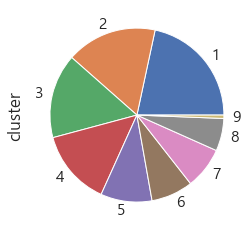

In [7]:
df['cluster'].value_counts().plot(kind='pie')


## boxplot

In [8]:
# # 클러스터 별로 boxplot 보고싶을 때

# temp = x.copy()
# temp['cluster'] = pred
# temp = temp.set_index('cluster')
# temp

# grouped = temp.groupby(level='cluster')
# grouped.boxplot(figsize=(40,40))

In [8]:
# feature 묶어서 먼저 3~5개 유형으로 클러스터들을 구분하기

df_grouped = x.copy()
df_grouped['의식'] = df_grouped['식료품비주류음료구입비'] + df_grouped['주류담배구입비'] + df_grouped['의류신발구입비']
df_grouped['집'] = df_grouped['주거수도광열비'] + df_grouped['가정용품가사서비스이용금액'] + df_grouped['통신비'] + df_grouped['기타상품서비스이용금액']
df_grouped['문화'] = df_grouped['오락문화비'] + df_grouped['음식숙박비'] + df_grouped['주거수도광열비']
df_grouped['보건'] = df_grouped['보건제품구입비']
df_grouped['교통'] = df_grouped['교통비']

# 기존 features 제거
df_grouped.drop(columns=cols_sobi_, inplace=True)
df_grouped

display_avg_table(df_house=df_house, df_feat=df_grouped)


,가구구분코드,가구원수,취업인원수,세대구분코드,소득,문화,집,의식,보건,교통
cluster,,,,,,,,,,
9,1.34,2.64,1.55,1.60,7050470,0.062,0.060,0.045,0.016,0.825
3,1.29,3.53,1.49,1.98,6151896,0.276,0.259,0.215,0.057,0.070
5,1.44,2.28,1.36,1.47,5182612,0.320,0.341,0.218,0.057,0.136
1,1.36,2.23,1.47,1.48,4684319,0.380,0.292,0.247,0.049,0.122
2,1.49,2.24,1.20,1.45,3833847,0.300,0.373,0.271,0.119,0.077
7,1.33,1.53,1.07,1.21,3152114,0.554,0.423,0.178,0.033,0.093
6,1.64,1.94,0.97,1.26,2980320,0.187,0.220,0.218,0.417,0.050
4,1.69,1.85,0.85,1.22,2355382,0.227,0.274,0.473,0.101,0.047
8,1.67,1.47,0.62,1.16,1947374,0.563,0.582,0.226,0.065,0.037


### 1. 문화 
- C7 C8 C1
- 오락문화비 음식숙박비 주거수도광열비

In [20]:
df = x.copy()

df['cluster'] = pred
df = df.loc[df['cluster'].isin([1,7,8])]
df = df[['오락문화비', '음식숙박비', '주거수도광열비', 'cluster']]



 # 1. values 생성
features = df.columns
values_list = []
for f in features:
   values_list.extend(list(df[f]))
print(len(values_list))

# 2. 업종 생성

category_list = []
for f in features:
   category_list.extend([f for i in range(len(df))])
print(len(category_list))

# 3. pred 생성

pred_list = []
for f in features:
   pred_list.extend(list(df['cluster']))
print(len(pred_list))

dfdf = pd.DataFrame(list(zip(values_list, category_list, pred_list)),
                      columns=['value', '업종', 'cluster']
                      )
dfdf['업종'] = dfdf['업종'].astype('category')

# 그림


fig, axes = plt.subplots(1, 3, figsize=(27,7))

means = df[features].mean().sort_values(ascending=False)
for i, f in zip(range(len(features)), features):
   temp = dfdf[dfdf['업종'] == f].sort_values('cluster')
   fig = px.box(temp, x="업종", y="value", color="cluster", points=False)
   fig.add_hline(y=means[f])  # 전체평균선 추가
   # fig.write_image(
   #     data_dir + "clustering_results/ver{0}/boxplot/cluster{1}_{2}.png".format(ver, k, f))
   fig.show()


67964
67964
67964


TypeError: 'module' object is not callable

### 2. 집 

### 3. 의식 

### 4. 보건 

### 5. 교통 

## 성능 평가 

In [70]:
y = pred['0'].values

# print out scores
print('Silhouette score: ',
      round(silhouette_score(x, y, metric='euclidean'), 3))
print('Davies-Bouldin score: ',
      round(davies_bouldin_score(x, y), 3))


Silhouette score:  0.062
Davies-Bouldin score:  2.375


## 벤치마크 모델 비교  

In [96]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(x)
preds = kmeans.labels_

y = preds

# print out scores
print('Silhouette score: ',
      round(silhouette_score(x, y, metric='euclidean'), 3))
print('Davies-Bouldin score: ',
      round(davies_bouldin_score(x, y), 3))

pd.DataFrame(y).to_csv('clustering_results/pred_KMEANS.csv', index=False)


Silhouette score:  0.201
Davies-Bouldin score:  1.449


In [97]:
embed = umap.UMAP(random_state=2021, n_components = 3).fit_transform(x)

kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(embed)
preds = kmeans.labels_

y = preds

# print out scores
print('Silhouette score: ',
      round(silhouette_score(x, y, metric='euclidean'), 3))
print('Davies-Bouldin score: ',
      round(davies_bouldin_score(x, y), 3))

pd.DataFrame(y).to_csv('clustering_results/pred_UMAP3_KMEANS.csv', index=False)


Silhouette score:  0.138
Davies-Bouldin score:  1.843


In [98]:
clustering = AgglomerativeClustering(n_clusters=8).fit(x)
preds = clustering.labels_

y = preds

# print out scores
print('Silhouette score: ',
      round(silhouette_score(x, y, metric='euclidean'), 3))
print('Davies-Bouldin score: ',
      round(davies_bouldin_score(x, y), 3))

pd.DataFrame(y).to_csv('clustering_results/pred_HC.csv', index=False)

Silhouette score:  0.128
Davies-Bouldin score:  1.678


In [6]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.5, min_samples=5).fit(x) # default(eps=0.5, min_samples=5), (eps=3, min_samples=2) 로 돌리면 n_cluster=1 나옴
preds = clustering.labels_

y = preds

# print out scores
print('Silhouette score: ',
      round(silhouette_score(x, y, metric='euclidean'), 3))
print('Davies-Bouldin score: ',
      round(davies_bouldin_score(x, y), 3))

pd.DataFrame(y).to_csv('clustering_results/pred_DBSCAN.csv', index=False)
print('number of clusters: ', len(set(y)))

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# tree 구조 (HC)

In [3]:
X = pd.read_csv('clustering_results/hle_HC_e50_k9_v1.csv')

# hc arguments
hc_args = {"n_clusters":n_clusters, 'linkage':'ward'}

# setting distance_threshold=0 ensures we compute the full tree.
# model = AgglomerativeClustering(n_clusters=9, linkage='ward') # 5min1.7s
# model = model.fit(X)


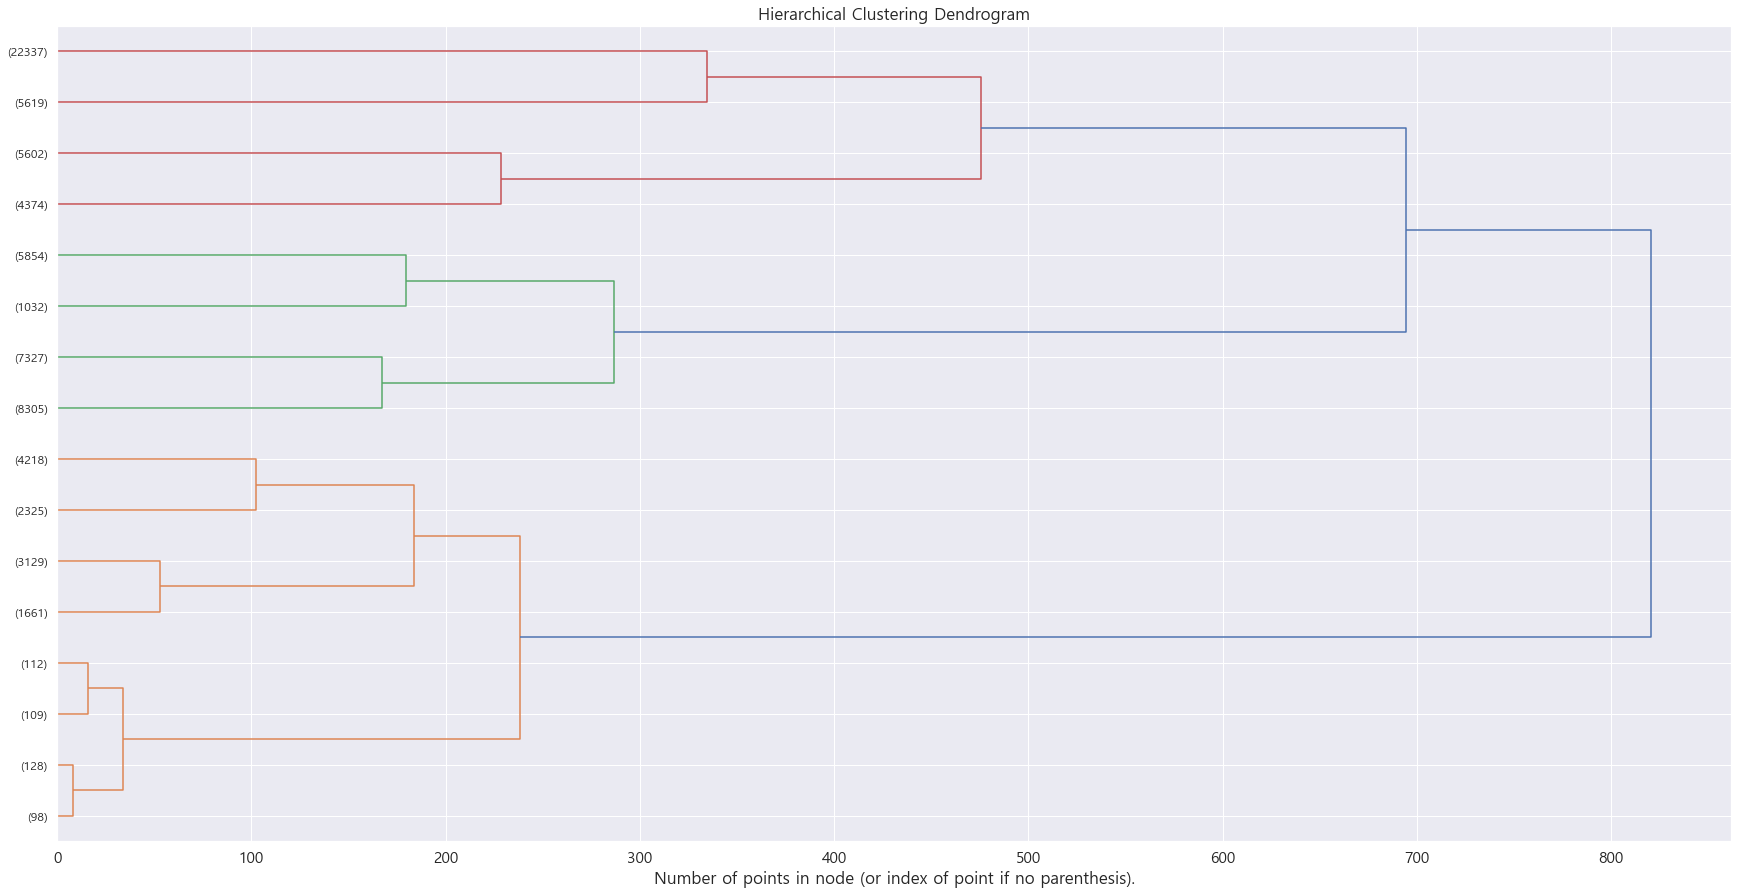

In [9]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#sphx-glr-auto-examples-cluster-plot-agglomerative-dendrogram-py

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, orientation='right', **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None) # 
model = model.fit(X)

plt.figure(figsize=(30, 15))
plt.title("Hierarchical Clustering Dendrogram")
# plot the top p levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.savefig('./clustering_results/HC_tree.png')
plt.show()
